This is the implementation for the Brutal Force approach of the [plum-tree](http://localhost:8888/notebooks/PlumTree/plum-tree.ipynb#)

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la

%matplotlib inline


## Define a function to do the calculation

To calculate today's Y, based on parameters f1 and f2, and the values from the previous day.

In [8]:
def dx_cal(X, f1, f2) : # X = np.array([P_total, Rotten, Good])
    # setting up parameters.
    Q = 5    # number of new plums per day
    W1 = np.array([[1,  0, 0, 0, f2],
                   [0,  1, 0, 0, -(1-f2)],
                   [0,  0, 1, 0, 1],
                   [0,  0, 0, 1, 0],
                   [0,  0, 0, -0.35*f1, 1]])

    W2 = np.array([[1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0],
                   [1, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 1, 0, 0, 0]])

    B = np.array([[ Q, 0, Q,-2*Q, 0]]).T
    
    W1_inv = la.inv(W1)
    
    # extend X to X_tmp, with M and N, whose value will be initially 0, as it just a place holder
    X_tmp = np.concatenate((X, np.array([[0],
                                         [0]])))
    Y = W1_inv.dot(W2.dot(X_tmp) + B)
    return Y[:3]        # only output the first 3 elements, for P_total, Rotten and Good


Now, I noticed that the crucial this is the values of f-factors. For now, I can create a lookup table


In [9]:
F = np.array([[1, 0.75],   # Day0, The farmer's day -- has infection at the beginning, farmer dis-infects it at the end of the day.
              [0, 0],      # for Day 1, after the farmer's dis-infection
              [0, 0],      # Day2, no infection of the rotten disease
              [1, 0],      # Day3, infection starts
              [1, 0.75]])  # Day4, which effectively returns to Day0. The whole procedure returns to itself, using the
                           # remainder i.e. Day_index%4.

# Create a Panda Frame for the result
Results = pd.DataFrame(columns = ('P_total','Rotten', 'Good'), dtype=int)
Results.index.name = "Day"
Results.loc[0] = np.array([100, 3, 97])    # Day0 values, the initial value, M and N doesn't matter, so give them 0
for k in range(20):
    day_idx = k + 1;
    X_k = np.array([Results.loc[k]]).T.astype(float)   
    tmp = day_idx % 4 
    X_k1 = dx_cal(X_k, F[tmp,0], F[tmp,1])
    Results.loc[day_idx] = np.rint(X_k1.T[0])

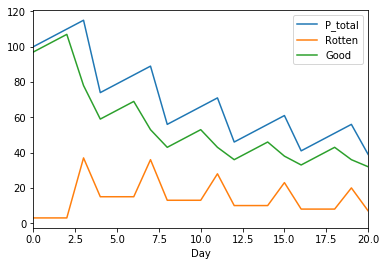

In [10]:
Results.plot()